1. Mount Drive
The commands below will promote an action to give permission to mount you drive through any of your affiliated Google accounts. `ACCEPT` them.

2. After that, you will have mounted but still not in your actual cloud drive yet. ou are in still in colab storage vm.

3. if you `ls` you will see that there are `MyDrive` (your actual drive) and other dir.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Get you to your actul drive cd `MyDrive`. write `pwd` it will show `content/drive/MyDrive`
2. From here you can create a diffrent directory if you want to
3.`git clone`, `cd` into your clone dir.
4. Move your existing file into this directory that is now in your dirve. You can use the following commands
Example: !cp "/content/drive/MyDrive/Colab Notebooks/Untitled.ipynb" "/content/drive/MyDrive/Folder_name/Untitled.ipynb"

Note: You can use `mv` to move the file instead of copying it
Untitled.ipynb can be renamed to anything


Now that your work is set up in your Drive, you can open a new Colab session directly from your `Folder_name` directory. There are two primary ways to do this, both of which avoid creating a temporary "Welcome" file.

## Method 1: Using the Google Drive UI

This is the most common and straightforward method.

1.  **Open Google Drive** in your web browser.
2.  **Navigate to your `Folder_name` folder**.
3.  **Double-click** on the `.ipynb` notebook file you want to open. It will automatically launch in Colab.

This method directly opens the existing notebook file, ensuring you're working on the correct, persistent version.

***

## Method 2: Creating a New Notebook in the Correct Location

If you need to start a brand new notebook for a project within the `folder_name` directory, you can create it directly from your Google Drive.

1.  **Open Google Drive** and navigate to the `folder_name` folder.
2.  **Right-click** in an empty space within the folder.
3.  Go to **More > Google Colaboratory**.

This creates a new, blank Colab notebook file directly inside your directory.
You will then need to start your session by mounting your Drive and changing the working directory to your `folder_name` folder using `cd /content/drive/MyDrive/folder_name`.

This ensures any new files you create or clone are saved to the correct location.

In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset,DataLoader
from sklearn.model_selection import train_test_split
from torch import nn
import matplotlib.pyplot as plt

We now set the device. Here we want to leverage colabs `cuda gpu` that is more capable. I mean why not

We then print the device to ensure it is what we want `cuda`

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
# 1. Setup data
weight = 0.7
bias = 0.3
start = 0.0
end = 1
step = 0.02

x = torch.arange(start, end, step).unsqueeze(dim=1) #manipulate the dimensions without altering the values of data
y = weight * x + bias


In [ ]:
# splittng the data into training and splitting.
# Not sure why we obey the 80-20 split law but that is how I split this data

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42) # it can also accept test_size instead

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [ ]:
torch.manual_seed(42)

model_1 = LinearRegressionModel()

list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# define the optimizer and the loss.
# these 2 are basically married

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.001) # lr is the learning rate while params is

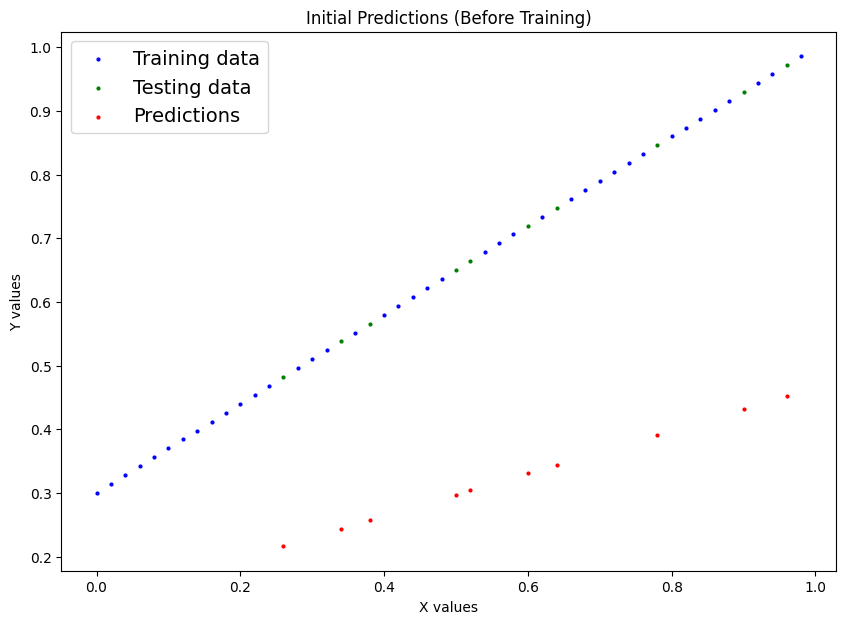

In [ ]:
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    initial_preds = model_1(x_test)

def plot_predictions(train_data=x_train, train_labels=y_train, test_data=x_test, test_labels=y_test, predictions=None, title=""):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})
    plt.title(title)
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.show()

plot_predictions(predictions=initial_preds, title="Initial Predictions (Before Training)")


Epoch: 0 | Loss: 0.3403 | Test Loss: 0.3835
Epoch: 10 | Loss: 0.3281 | Test Loss: 0.3708
Epoch: 20 | Loss: 0.3160 | Test Loss: 0.3581
Epoch: 30 | Loss: 0.3038 | Test Loss: 0.3453
Epoch: 40 | Loss: 0.2916 | Test Loss: 0.3326
Epoch: 50 | Loss: 0.2795 | Test Loss: 0.3199
Epoch: 60 | Loss: 0.2673 | Test Loss: 0.3071
Epoch: 70 | Loss: 0.2551 | Test Loss: 0.2944
Epoch: 80 | Loss: 0.2430 | Test Loss: 0.2816
Epoch: 90 | Loss: 0.2308 | Test Loss: 0.2689
Epoch: 100 | Loss: 0.2186 | Test Loss: 0.2562
Epoch: 110 | Loss: 0.2065 | Test Loss: 0.2434
Epoch: 120 | Loss: 0.1943 | Test Loss: 0.2307
Epoch: 130 | Loss: 0.1821 | Test Loss: 0.2180
Epoch: 140 | Loss: 0.1700 | Test Loss: 0.2052
Epoch: 150 | Loss: 0.1578 | Test Loss: 0.1925
Epoch: 160 | Loss: 0.1456 | Test Loss: 0.1797
Epoch: 170 | Loss: 0.1335 | Test Loss: 0.1670
Epoch: 180 | Loss: 0.1224 | Test Loss: 0.1549
Epoch: 190 | Loss: 0.1127 | Test Loss: 0.1436
Epoch: 200 | Loss: 0.1045 | Test Loss: 0.1331
Epoch: 210 | Loss: 0.0974 | Test Loss: 0.1234

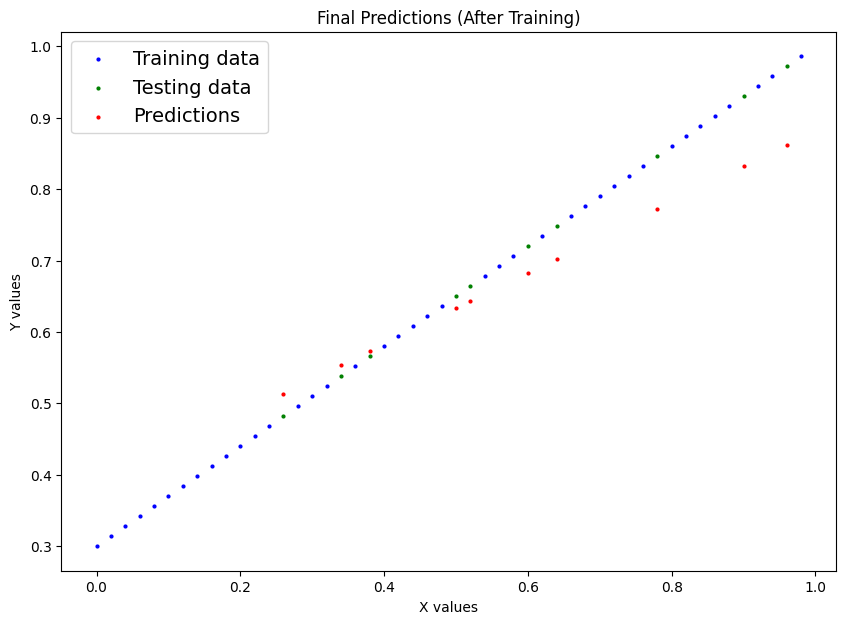

In [ ]:
# the trainin loop itself
# epoch is the number ofloops
torch.manual_seed(42)

epochs = 380

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  # train on
  model_1.train()

  # forward propagation
  y_pred = model_1(x_train)


  # loss
  loss = loss_fn(y_pred, y_train) # the order doesn't matter here

  # stop the tracking
  optimizer.zero_grad()

  #backward propagation
  loss.backward()

  # optimize the model
  optimizer.step()


  # Set model to evaluation mode
  model_1.eval()

  # Inference (no gradient tracking)
  with torch.inference_mode():
      test_pred = model_1(x_test)
      test_loss = loss_fn(test_pred, y_test)

  # Print results
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}")

# **7. Make and plot predictions (after training)**
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(x_test)

plot_predictions(predictions=y_preds, title="Final Predictions (After Training)")

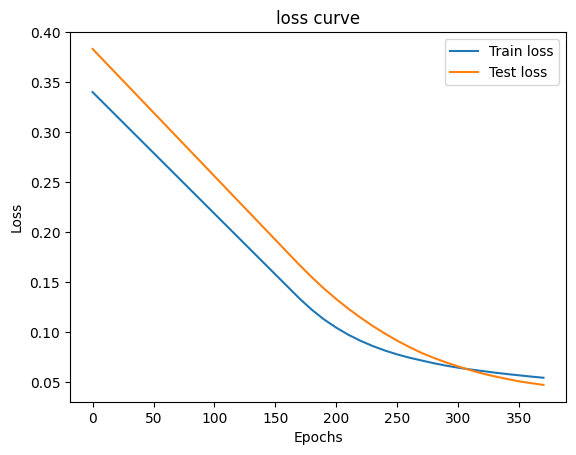

In [ ]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [ ]:
!git config --global user.email "Juergengeorg50@gm.com"
!git config --global user.name "Your Name"


In [117]:
%cd /content/drive/MyDrive/Colab/Pytorch
!git add .
!git commit -m "Improved loss tracking and plotting"
!git push origin main


/content/drive/MyDrive/Colab/Pytorch
[main 4ae28b5] Improved loss tracking and plotting
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite torch_1.ipynb (97%)
fatal: could not read Username for 'https://github.com': No such device or address
